In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

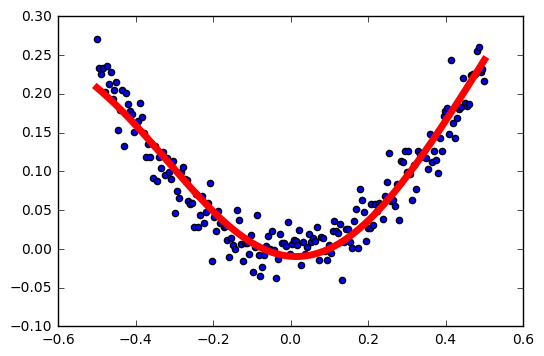

In [2]:
#使用numpy生成两百个随机点
#np.linspace生成[-0.5，0.5]均匀分布的200个数字
#[:,np.newaxis]扩展维度  但是具体有什么用。不懂，没有形象
x_data =  np.linspace(-0.5,0.5,200)[:,np.newaxis]
#正态分布(均值，标准差，形状)
noise = np.random.normal(0,0.02,x_data.shape)
y_data = np.square(x_data) + noise

#定义两个placeholder 
#因为神经网络是以batch进行训练，所以需要feed
#此函数可以理解为形参，先占位，后赋值
#(数据类型，形状(None表一维，默认)，名称)
x = tf.placeholder(tf.float32,[None,1])
y = tf.placeholder(tf.float32,[None,1])

#神经网络1-10-1
#定义隐层
weight_L1 = tf.Variable(tf.random_normal([1,10]))
biases_L1 = tf.Variable(tf.zeros([1,10]))
Wx_plus_b_L1 =  tf.matmul(x,weight_L1) + biases_L1
#激活函数，tf.nn提供神经网络相关操作
L1 = tf.nn.tanh(Wx_plus_b_L1)

#定义输出层
weight_L2 = tf.Variable(tf.random_normal([10,1]))
biases_L2 = tf.Variable(tf.zeros([1,1]))
Wx_plus_b_L2 = tf.matmul(L1,weight_L2) + biases_L2
prediction = tf.nn.tanh(Wx_plus_b_L2)

#二次代价函数
#可跨越维度的计算张量个元素的平均值
loss = tf.reduce_mean(tf.square(prediction - y))
train = tf.train.GradientDescentOptimizer(0.1).minimize(loss)
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for i in range(2001):
        #feed_dict的作用是使用placeholder创建出来的tensor赋值
        sess.run(train,feed_dict={x:x_data,y:y_data})
    #获得预测值
    #这里feed应该是用测试集
    prediction_value = sess.run(prediction,feed_dict={x:x_data})
    plt.figure()
    plt.scatter(x_data,y_data)
    plt.plot(x_data,prediction_value,'r-',lw=5)
    plt.show()